In [125]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Define transformations for the data
transform = transforms.Compose([transforms.ToTensor()])

# Download and load the training data
trainset = datasets.MNIST(root='./data/train', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=32, shuffle=True)

In [ ]:
fig, axs = plt.subplots(2, 10, figsize=(20, 4))
for i in range(10):
  img, _ =  trainset[i]
  axs[0, i].imshow(img[0], cmap='gray')

plt.show()

In [ ]:
trainloader

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

class Encoder(nn.Module):
  def __init__(self):
    super(Encoder, self).__init__()
    self.conv1 = nn.Conv2d(1, 16, 3, stride=1, padding=1)  # Output: 16 x 28 x 28
    self.conv2 = nn.Conv2d(16, 32, 4, stride=2, padding=1)  # Output: 32 x 14 x 14
    self.conv3 = nn.Conv2d(32, 64, 16, stride=2, padding=1)  # Output: 64 x 1 x 1
    self.relu = nn.ReLU()

  def forward(self, x):
    x = self.relu(self.conv1(x))
    x = self.relu(self.conv2(x))
    x = self.relu(self.conv3(x))
    return x

encoder = Encoder()
# print(encoder)

In [ ]:
class Decoder(nn.Module):
  def __init__(self):
    super(Decoder, self).__init__()
    self.conv1 = nn.ConvTranspose2d(64, 32, 9, stride=1, padding=1)  # Output: 32 x 7 x 7
    self.conv2 = nn.ConvTranspose2d(32, 16, 4, stride=2, padding=1)  # Output: 16 x 14 x 14
    self.conv3 = nn.ConvTranspose2d(16, 1, 4, stride=2, padding=1)  # Output: 1 x 28 x 28
    self.relu = nn.ReLU()

  def forward(self, x):
    x = self.relu(self.conv1(x))
    x = self.relu(self.conv2(x))
    x = self.relu(self.conv3(x))
    return x

decoder = Decoder()
# print(decoder)

In [ ]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = Encoder()
        self.decoder = Decoder()

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

model = Autoencoder()
# print(model)

In [ ]:
fig, axs = plt.subplots(2, 10, figsize=(20, 4))
for i in range(10):
  img, _ =  trainset[i]
  axs[0, i].imshow(img[0], cmap='gray')
  axs[1, i].imshow(model(img.unsqueeze(0)).detach().numpy()[0][0], cmap='gray')

plt.show()

In [ ]:
# Set up loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 10
for epoch in range(epochs):
    loss = 0
    for data in trainloader:
        images, _ = data
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, images)
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [1/10], Loss: 0.0083
Epoch [2/10], Loss: 0.0063
Epoch [3/10], Loss: 0.0053
Epoch [4/10], Loss: 0.0063
Epoch [5/10], Loss: 0.0055
Epoch [6/10], Loss: 0.0060
Epoch [7/10], Loss: 0.0054
Epoch [8/10], Loss: 0.0062
Epoch [9/10], Loss: 0.0048
Epoch [10/10], Loss: 0.0041


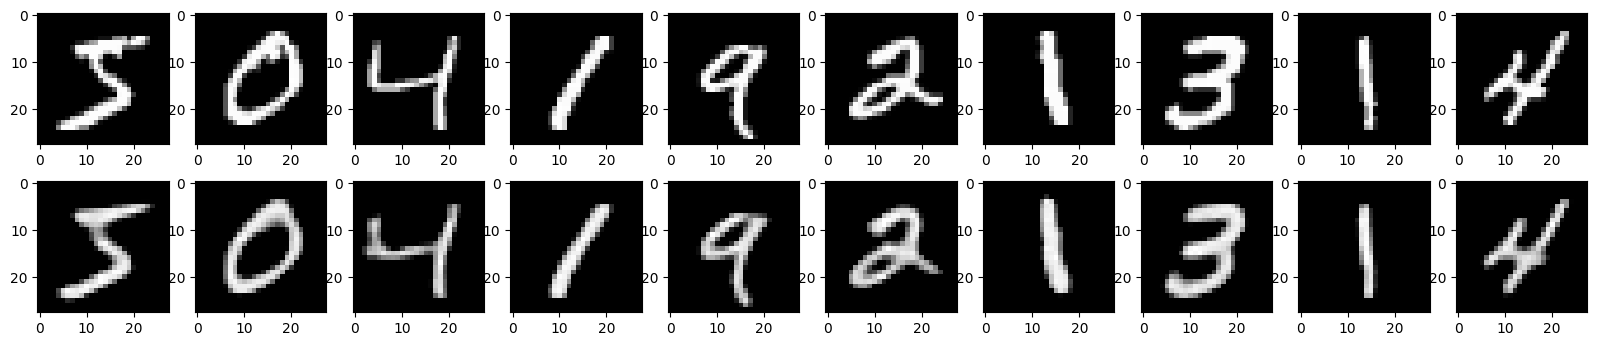

In [126]:
fig, axs = plt.subplots(2, 10, figsize=(20, 4))
for i in range(10):
  img, _ =  trainset[i]
  axs[0, i].imshow(img[0], cmap='gray')
  axs[1, i].imshow(model(img.unsqueeze(0)).detach().numpy()[0][0], cmap='gray')

plt.show()